<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Thanks for taking the time to improve the project! It is now accepted. Good luck on the next sprint!
    
</div>

**Review**

Hi, my name is Dmitry and I will be reviewing your project.
  
You can find my comments in colored markdown cells:
  
<div class="alert alert-success">
  If everything is done successfully.
</div>
  
<div class="alert alert-warning">
  If I have some (optional) suggestions, or questions to think about, or general comments.
</div>
  
<div class="alert alert-danger">
  If a section requires some corrections. Work can't be accepted with red comments.
</div>
  
Please don't remove my comments, as it will make further review iterations much harder for me.
  
Feel free to reply to my comments or ask questions using the following template:
  
<div class="alert alert-info">
  For your comments and questions.
</div>
  
First of all, thank you for turning in the project! You did a great job overall, but there are some issues that need to be fixed before the project is accepted. Let me know if you have questions!

# Introduction: Integrated Project 2 | Sprint 10 
In this project I will prepare a prototype of a machine learning model for Zyfra. The company develops efficiency solutions for heavy industry.  The model will predict the amount of gold recovered from gold ore. I have the data on extraction and purification.  And will have access to three datasets.  The model will help to optimize the production and eliminate unprofitable parameters.  Here, I will prepare the data; perform the data analysis; and develop and train a model. --Brandi Booth

<div class="alert alert-info">
    <h2>Import & Prepare Data</h2>
        <p></p>
</div>


In [1]:
# import pandas and numpy for data preprocessing and manipulation
import pandas as pd
import numpy as np
import re

# seaborn for visualization
import seaborn as sns
sns.set_style("darkgrid")

# matplotlib for visualization
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# import scipy modules
from scipy import stats as st

# import joblib modules
from joblib import dump

# import sklearn modules
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.utils import resample
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyRegressor

# import warnings and display html
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display_html
from itertools import chain,cycle
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
#pd.set_option('display.max_rows', None)

print('Imports are successfully loaded!')


Imports are successfully loaded!


In [2]:
df_train = pd.read_csv('/datasets/gold_recovery_train.csv')
df_test = pd.read_csv('/datasets/gold_recovery_test.csv')
df_full = pd.read_csv('/datasets/gold_recovery_full.csv')

In [3]:
df_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


In [5]:
df_train.dropna()


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16855,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
16856,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
16857,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
16858,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


Dropping missing values looses over 5,000 rows of observations which is too signicant to the data.  So I will leave it for now.  

In [6]:
df_train.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,16788.000000,16788.000000,16490.000000,16789.000000,15339.000000,16794.000000,16677.000000,16715.000000,16794.000000,15553.000000,...,16731.000000,16747.000000,16768.000000,16767.000000,16775.000000,16775.000000,16775.000000,16776.000000,16757.000000,16775.000000
mean,4.716907,9.113559,8.301123,39.467217,67.213166,8.757048,2.360327,9.303932,2.687512,129.479789,...,19.101874,-494.164481,14.778164,-476.600082,15.779488,-500.230146,12.377241,-498.956257,18.429208,-521.801826
std,2.096718,3.389495,3.825760,13.917227,11.960446,3.634103,1.215576,4.263208,1.272757,45.386931,...,6.883163,84.803334,5.999149,89.381172,6.834703,76.983542,6.219989,82.146207,6.958294,77.170888
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.021781,-0.423260,-799.741097,0.427084,-800.258209,0.024270,-810.473526
25%,3.971262,8.825748,6.939185,42.055722,62.625685,7.610544,1.641604,7.870275,2.172953,103.064021,...,14.508299,-500.837689,10.741388,-500.269182,10.977713,-500.530594,8.925586,-500.147603,13.977626,-501.080595
50%,4.869346,10.065316,8.557228,44.498874,67.644601,9.220393,2.453690,10.021968,2.781132,131.783108,...,19.986958,-499.778379,14.943933,-499.593286,15.998340,-499.784231,11.092839,-499.933330,18.034960,-500.109898
75%,5.821176,11.054809,10.289741,45.976222,72.824595,10.971110,3.192404,11.648573,3.416936,159.539839,...,24.983961,-494.648754,20.023751,-400.137948,20.000701,-496.531781,15.979467,-498.418000,24.984992,-499.565540
max,16.001945,17.031899,18.124851,53.611374,100.000000,19.552149,6.086532,22.317730,9.789625,251.999948,...,60.000000,-127.692333,28.003828,-71.472472,63.116298,-275.073125,39.846228,-120.190931,54.876806,-39.784927


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

In [8]:
df_test.describe()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5554.000000,5572.000000,5856.000000,5690.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,...,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,170.515243,8.482873,7.264651,1.321420,1481.990241,-509.057796,1486.908670,-511.743956,1468.495216,-509.741212,...,15.636031,-516.266074,13.145702,-476.338907,12.308967,-512.208126,9.470986,-505.017827,16.678722,-512.351694
std,49.608602,3.353105,0.611526,0.693246,310.453166,61.339256,313.224286,67.139074,309.980748,62.671873,...,4.660835,62.756748,4.304086,105.549424,3.762827,58.864651,3.312471,68.785898,5.404514,69.919839
min,0.000103,0.000031,5.650000,0.000003,0.000000,-799.773788,0.000000,-800.029078,0.000000,-799.995127,...,0.000000,-799.798523,0.000000,-800.836914,-0.223393,-799.661076,0.528083,-800.220337,-0.079426,-809.859706
25%,143.340022,6.411500,6.885625,0.888769,1497.190681,-500.455211,1497.150234,-500.936639,1437.050321,-501.300441,...,12.057838,-501.054741,11.880119,-500.419113,10.123459,-500.879383,7.991208,-500.223089,13.012422,-500.833821
50%,176.103893,8.023252,7.259333,1.183362,1554.659783,-499.997402,1553.268084,-500.066588,1546.160672,-500.079537,...,17.001867,-500.160145,14.952102,-499.644328,12.062877,-500.047621,9.980774,-500.001338,16.007242,-500.041085
75%,207.240761,10.017725,7.650000,1.763797,1601.681656,-499.575313,1601.784707,-499.323361,1600.785573,-499.009545,...,18.030985,-499.441529,15.940011,-401.523664,15.017881,-499.297033,11.992176,-499.722835,21.009076,-499.395621
max,274.409626,40.024582,15.500000,5.433169,2212.432090,-57.195404,1975.147923,-142.527229,1715.053773,-150.937035,...,30.051797,-401.565212,31.269706,-6.506986,25.258848,-244.483566,14.090194,-126.463446,26.705889,-29.093593


In [9]:
df_test.isna().sum()

date                                            0
primary_cleaner.input.sulfate                 302
primary_cleaner.input.depressant              284
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                166
primary_cleaner.state.floatbank8_a_air         16
primary_cleaner.state.floatbank8_a_level       16
primary_cleaner.state.floatbank8_b_air         16
primary_cleaner.state.floatbank8_b_level       16
primary_cleaner.state.floatbank8_c_air         16
primary_cleaner.state.floatbank8_c_level       16
primary_cleaner.state.floatbank8_d_air         16
primary_cleaner.state.floatbank8_d_level       16
rougher.input.feed_ag                          16
rougher.input.feed_pb                          16
rougher.input.feed_rate                        40
rougher.input.feed_size                        22
rougher.input.feed_sol                         67
rougher.input.feed_au                          16
rougher.input.floatbank10_sulfate             257


In [10]:
df_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [11]:
df_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [12]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


In [13]:
df_full.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,22627.000000,22629.000000,22331.000000,22630.000000,20753.000000,22633.000000,22516.000000,22445.000000,22635.000000,21107.000000,...,22571.000000,22587.000000,22608.000000,22607.000000,22615.000000,22615.000000,22615.000000,22616.000000,22597.000000,22615.000000
mean,4.781559,9.095308,8.640317,40.001172,67.447488,8.923690,2.488252,9.523632,2.827459,140.277672,...,18.205125,-499.878977,14.356474,-476.532613,14.883276,-503.323288,11.626743,-500.521502,17.976810,-519.361465
std,2.030128,3.230797,3.785035,13.398062,11.616034,3.517917,1.189407,4.079739,1.262834,49.919004,...,6.560700,80.273964,5.655791,93.822791,6.372811,72.925589,5.757449,78.956292,6.636203,75.477151
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.836914,-0.423260,-799.741097,0.427084,-800.258209,-0.079426,-810.473526
25%,4.018525,8.750171,7.116799,42.383721,63.282393,7.684016,1.805376,8.143576,2.303108,110.177081,...,14.095940,-500.896232,10.882675,-500.309169,10.941299,-500.628697,8.037533,-500.167897,13.968418,-500.981671
50%,4.953729,9.914519,8.908792,44.653436,68.322258,9.484369,2.653001,10.212998,2.913794,141.330501,...,18.007326,-499.917108,14.947646,-499.612292,14.859117,-499.865158,10.989756,-499.951980,18.004215,-500.095463
75%,5.862593,10.929839,10.705824,46.111999,72.950836,11.084557,3.287790,11.860824,3.555077,174.049914,...,22.998194,-498.361545,17.977502,-400.224147,18.014914,-498.489381,14.001193,-499.492354,23.009704,-499.526388
max,16.001945,17.031899,19.615720,53.611374,100.000000,19.552149,6.086532,22.861749,9.789625,274.409626,...,60.000000,-127.692333,31.269706,-6.506986,63.116298,-244.483566,39.846228,-120.190931,54.876806,-29.093593


In [14]:
df_full.isna().sum()

date                                            0
final.output.concentrate_ag                    89
final.output.concentrate_pb                    87
final.output.concentrate_sol                  385
final.output.concentrate_au                    86
                                             ... 
secondary_cleaner.state.floatbank5_a_level    101
secondary_cleaner.state.floatbank5_b_air      101
secondary_cleaner.state.floatbank5_b_level    100
secondary_cleaner.state.floatbank6_a_air      119
secondary_cleaner.state.floatbank6_a_level    101
Length: 87, dtype: int64

<div class="alert alert-success">
<b>Reviewer's comment</b>

The data was loaded and inspected!
    

</div>

### Check that recovery is calculated correctly.

In [15]:
df_train['rougher.output.recovery'].isna().sum()

2573

In [16]:
#df_train['rougher.output.recovery'] = df_train[df_train['rougher.output.recovery'].isnull() == False]['rougher.output.recovery']


In [17]:
df_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<b> Formula<br>
Recovery = (C *(F -T) / F *(C- T)) *100

In [18]:
C = (df_train[df_train['rougher.output.tail_au'].notnull() & df_train['rougher.input.feed_au'].notnull() \
          & df_train['rougher.output.concentrate_au'].notnull()]['rougher.output.concentrate_au'])

In [19]:
F = (df_train[df_train['rougher.output.tail_au'].notnull() & df_train['rougher.input.feed_au'].notnull() 
              & df_train['rougher.output.concentrate_au'].notnull()]['rougher.input.feed_au'])

In [20]:
T = df_train[df_train['rougher.output.tail_au'].notnull() & df_train['rougher.input.feed_au'].notnull() \
          & df_train['rougher.output.concentrate_au'].notnull()]['rougher.output.tail_au']

In [21]:
#Feature engineering recovery column using formula
df_train['recovery'] = ((C*(F-T))/(F*(C-T)))*100
display(df_train[df_train['recovery'].notnull()]['recovery'])

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
16855    89.574376
16856    87.724007
16857    88.890579
16858    89.858126
16859    89.514960
Name: recovery, Length: 14577, dtype: float64

In [22]:
df_train['rougher.output.recovery'] = df_train['rougher.output.recovery'].fillna(0)
df_train['recovery'] = df_train['recovery'].fillna(0)

In [23]:
mae = mean_absolute_error(df_train['rougher.output.recovery'],df_train['recovery'].notnull())
mae

69.1632237642169

Based on mean absolute error, it appears high and that recovery may have not been calculated correctly. We'll investigate further on how far off the calculations were.

In [24]:
df_train.columns

Index(['date', 'final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_clean

In [25]:
#Feature engineer an error column, round to 2 decimals | target - predicted
df_train['error'] = round(abs(df_train['rougher.output.recovery'] - df_train['recovery']), 2)

In [26]:
show_error0 = df_train[df_train['error'] == 0]['error']
show_error0.count()

16570

In [27]:
df_train['error'].shape 

(16860,)

In [28]:
ans = 16860 - 16570
print('amount of error in observations:', ans)

amount of error in observations: 290


In [29]:
#show the division/ math of percentage recovery calculated incorrectly
print('Amount calculated incorrectly', (len(df_train[df_train['error'] != 0])/ (len(df_train['error'])))*100, '%')

Amount calculated incorrectly 1.7200474495848161 %


So 1.7% of the data was calculated incorrectly. Leaving roughly 98% calculated correctly.  But our mean_absolute_error was calculated rather high for such low error rate.  This may indicate outliers.

In [30]:
#Look at error column 
#pd.set_option('display.max_rows', 290)
print(df_train[df_train['error'] != 0] ['error'])

53          188.74
372        3913.31
377         116.31
560           1.09
700      112789.87
           ...    
16697       112.96
16698       100.44
16699         0.48
16700         0.58
16701         1.50
Name: error, Length: 290, dtype: float64


In [31]:
#Look at infinity values
print(df_train[df_train['error'] == np.inf][['error', 'rougher.output.tail_au', 'rougher.input.feed_au', \
                                            'rougher.output.concentrate_au',]])

print()
print('Amount of errors with infinity:',(df_train[df_train['error'] == np.inf]['error'].count()))

       error  rougher.output.tail_au  rougher.input.feed_au  \
1149     inf                2.447669                    0.0   
1150     inf                2.693501                    0.0   
2573     inf                2.672610                    0.0   
3083     inf                1.637472                    0.0   
3084     inf                1.703065                    0.0   
3085     inf                2.164390                    0.0   
3086     inf                3.211033                    0.0   
3087     inf                2.798918                    0.0   
3088     inf                2.690033                    0.0   
3089     inf                2.916833                    0.0   
4034     inf                3.566809                    0.0   
5810     inf                1.148358                    0.0   
6105     inf                1.334945                    0.0   
7070     inf                0.734503                    0.0   
7071     inf                0.758442                   

For recovery formula |`rougher.input.feed_au` is a divided by amount. To divide by zero is not feasible so these inf values should be disregarded. These should not affect the mae, so now I will look at all errors that are not infinte.

In [32]:
#cancel infinite
no_inf_df = df_train[df_train['error'] != np.inf][[
                                  'error',
                                  'rougher.output.recovery',
                                  'recovery',
                                  'rougher.output.concentrate_au',
                                  'rougher.input.feed_au',
                                  'rougher.output.tail_au']].sort_values(by='error', ascending=True)[:25]
no_inf_df

,error,rougher.output.recovery,recovery,rougher.output.concentrate_au,rougher.input.feed_au,rougher.output.tail_au
0,0.0,87.107763,87.107763,19.793808,6.486150,1.170244
11130,0.0,88.936811,88.936811,20.226673,6.908033,1.097659
11131,0.0,88.201751,88.201751,20.313656,6.484868,1.064966
11132,0.0,89.463865,89.463865,20.663048,7.136448,1.088116
11133,0.0,89.790066,89.790066,20.243659,7.388734,1.122137
11134,0.0,90.386460,90.386460,19.316469,7.223227,1.048942
11135,0.0,91.517692,91.517692,19.234533,6.874382,0.866534
11136,0.0,92.094609,92.094609,19.146521,6.873221,0.811706
11137,0.0,92.483913,92.483913,18.874225,6.798616,0.766254
11138,0.0,91.825619,91.825619,19.328737,6.797225,0.820626


In [33]:
print(df_train['rougher.output.recovery'].max())
print()
print(df_train['rougher.output.recovery'].min())


100.0

0.0


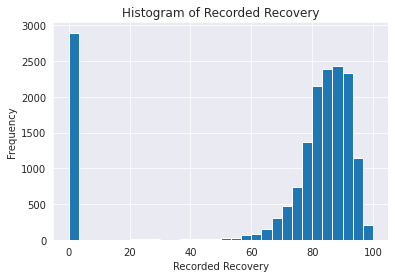

In [34]:
plt.hist(data=df_train, x='rougher.output.recovery', bins=30)
plt.xlabel('Recorded Recovery')
plt.ylabel('Frequency')
plt.title('Histogram of Recorded Recovery')
plt.show()


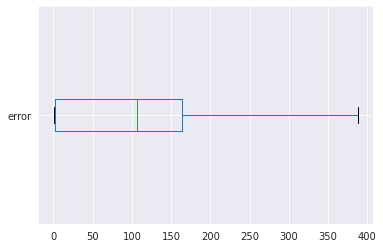

In [35]:
df_train[df_train['error']>0]['error'].plot(kind='box', 
                                       vert=False,
                                       showfliers=False)
plt.show()

In [36]:
#Use interquartile range, determine outlier threshold
outliers = df_train[df_train['error']>0]['error'].quantile(0.75) + 1.5*(df_train[df_train['error']>0]['error'].quantile(0.75) - df_train[df_train['error']>0]['error'].quantile(0.25))
display(outliers)

print()
mae_outliers_none = mean_absolute_error(df_train[df_train['error']<outliers]\
                                      ['rougher.output.recovery'],df_train[df_train['error']<outliers]['recovery'])
print('mean absolute errors with no outliers',mae_outliers_none)

407.68125


mean absolute errors with no outliers 1.0875173751488512


<b> Conclusion, recovery is calculated correctly.
I measured the spread of data using intersquartile range and calculated the outliers. By multiplying the difference between the 75th and 25th percentiles by 1.5. Out of over 16,000 observations of data, a small number of outliers cause the mean absolute error to go from 69.163 to 1.0875.  The recovery is calculated correctly.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Excellent analysis! If you drop all null targets, the MAE will be even smaller

</div>

<b>Next: Analyze the features not available in the test set.

In [37]:
#Look at columns
df_test.columns

Index(['date', 'primary_cleaner.input.sulfate',
       'primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size',
       'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'roughe

The features that are not available in the test set; type and parameters are: output and calculations, nor is the final stage category available.  This ensures no data leakage for our models to be created. And all information is available in our full data set.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Yep, that's right

</div>

<b> Perform data preprocessing

In [38]:
#Eliminating NaNs from the datasets
df_train = df_train.dropna(how='any')
df_test = df_test.dropna(how='any')

<div class="alert alert-success">
<b>Reviewer's comment</b>

Null values were removed

</div>

In [39]:
print('shape of training dataset:',df_train.shape)
print('shape of test dataset:', df_test.shape)

shape of training dataset: (11163, 89)
shape of test dataset: (5383, 53)




<div class="alert alert-info">
    <h3>Conclusion Import and Prepare data</h3>
        <p>Looked into data.  Did not drop missing data because too much data would be taken away for looking at calculation.<br>
    Made the 'rougher.output.recovery' column to only display non-missing values, to be useful for examining or performing calculations on the non-null values of the 'rougher.output.recovery' column in the DataFrame. I calculated the error between two columns ('rougher.output.recovery' and 'recovery') in a DataFrame df_train. Recovery formula was performed and mae calculations give reason for further investigation.
<br>
            
I measured the spread of data using intersquartile range and calculated the outliers.  By multiplying the difference between the 75th and 25th percentiles by 1.5.  Out of over 16,000 observations of data, a small number of outliers cause the mean absolute error to go from 69.163 to 1.0875; with taking out the outliers.  The recovery is calculated correctly.


Outliers make contribution to mae calculation.  The boxplot, and scatter charts support this also.  When showing the distribution when an error occurred, 75% of the data is under 175, and nearly all less than 400.  Outliers in data change the mean, that is why the box plot which focuses on the median is a better choice for interpreting the distribution.
<br>
For the three datasets; The full dataset is composed by 22715 rows and 87 columns.
The training dataset instead by 16860 rows and 87 columns.
The test dataset is composed by 5856 rows and 53 columns. In preprocessing is where we eliminate missing values, the changes become: shape of training dataset: (11163, 89)
shape of test dataset: (5383, 53) After eliminating NaNs from data sets the numbers chang.  The test dataset is missing output and calculation columns.  
</p>
</div>

<div class="alert alert-success">
<b>Reviewer's comment</b>

Very good!

</div>

<div class="alert alert-info">
    <h2>Analyze the data</h2>
        <p></p>
</div>



<b>Take note of how the concentrations of metals (Au, Ag, Pb) change depending on the purification stage.</b>


In [40]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11163 entries, 0 to 16859
Data columns (total 89 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                11163 non-null  object 
 1   final.output.concentrate_ag                         11163 non-null  float64
 2   final.output.concentrate_pb                         11163 non-null  float64
 3   final.output.concentrate_sol                        11163 non-null  float64
 4   final.output.concentrate_au                         11163 non-null  float64
 5   final.output.recovery                               11163 non-null  float64
 6   final.output.tail_ag                                11163 non-null  float64
 7   final.output.tail_pb                                11163 non-null  float64
 8   final.output.tail_sol                               11163 non-null  float64


In [41]:
# Look at the mean level of concentration of each metal at each stage
print("Mean level of concentration of each metal at it's stage")
print()
print('Concentration of substances as flotation stage input:')
print('mean of concentrate before floatation stage, gold:', df_train['rougher.input.feed_au'].mean())
print('mean of concentrate before floatation stage, silver:', df_train['rougher.input.feed_ag'].mean())
print('mean of concentrate before floatation stage, lead:', df_train['rougher.input.feed_pb'].mean())
print()
print()
print('rougher output concentrate/ after floatation, gold:', df_train['rougher.output.concentrate_au'].mean())
print('rougher output concentrate/ after floatation, silver:', df_train['rougher.output.concentrate_ag'].mean())
print('rougher output concentrate/ after floatation, lead:', df_train['rougher.output.concentrate_pb'].mean())
print()
print('mean of concentration after primary cleaner stage, :gold', df_train['primary_cleaner.output.concentrate_au'].mean())
print('mean of concentration after primary cleaner stage, :silver', df_train['primary_cleaner.output.concentrate_ag'].mean())
print('mean of concentration after primary cleaner stage, :lead', df_train['primary_cleaner.output.concentrate_pb'].mean())
print()


Mean level of concentration of each metal at it's stage

Concentration of substances as flotation stage input:
mean of concentrate before floatation stage, gold: 8.118562526017952
mean of concentrate before floatation stage, silver: 8.78407430730952
mean of concentrate before floatation stage, lead: 3.560968867186145


rougher output concentrate/ after floatation, gold: 19.56489605256396
rougher output concentrate/ after floatation, silver: 11.717792694897119
rougher output concentrate/ after floatation, lead: 7.532420709496409

mean of concentration after primary cleaner stage, :gold 32.31615866934306
mean of concentration after primary cleaner stage, :silver 8.435391111086066
mean of concentration after primary cleaner stage, :lead 9.568582687626238



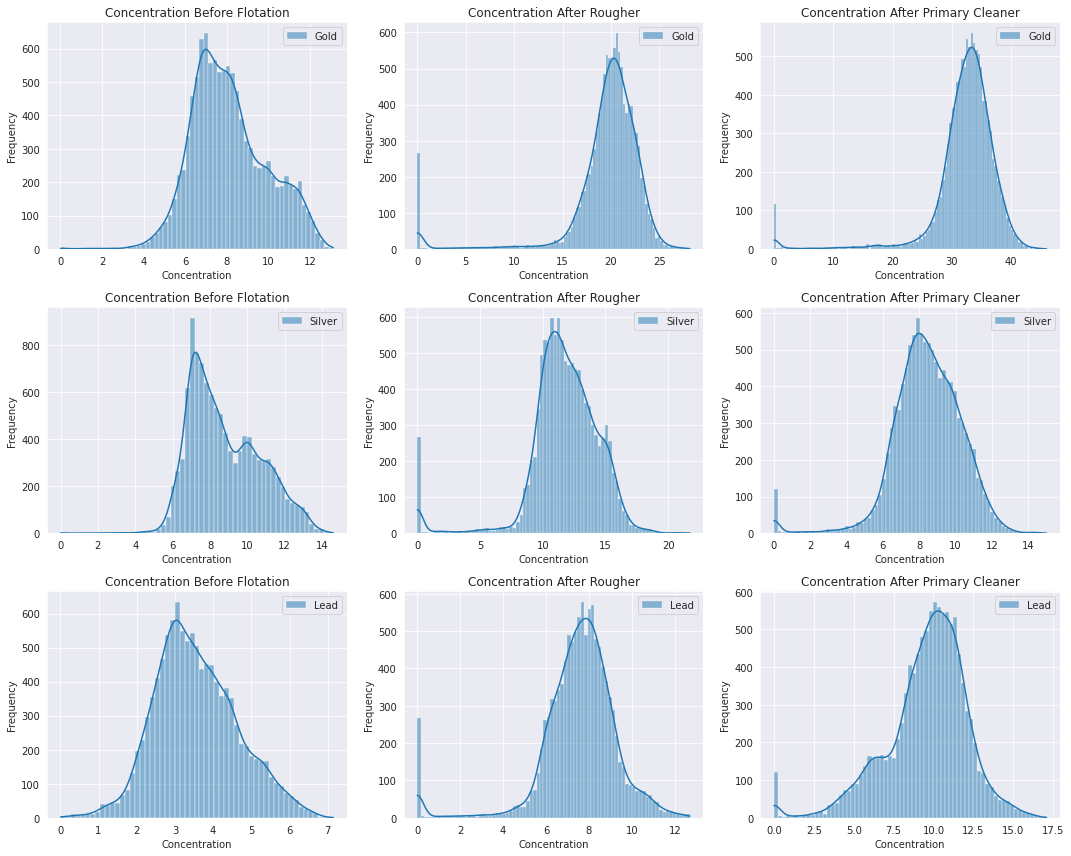

In [42]:
#Look at concentration levels
# Concentration values
concentration_before_flotation = df_train[['rougher.input.feed_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb']]
concentration_after_rougher = df_train[['rougher.output.concentrate_au', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb']]
concentration_after_primary_cleaner = df_train[['primary_cleaner.output.concentrate_au', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb']]

# Metal labels
metals = ['Gold', 'Silver', 'Lead']

# Setting figure size and creating subplots
fig, axs = plt.subplots(3, 3, figsize=(15, 12))

# Plotting histograms
for i in range(3):
    sns.histplot(concentration_before_flotation.iloc[:, i], kde=True, label=metals[i], ax=axs[i, 0])
    axs[i, 0].set_title('Concentration Before Flotation')
    axs[i, 0].set_xlabel('Concentration')
    axs[i, 0].set_ylabel('Frequency')
    axs[i, 0].legend()

    sns.histplot(concentration_after_rougher.iloc[:, i], kde=True, label=metals[i], ax=axs[i, 1])
    axs[i, 1].set_title('Concentration After Rougher')
    axs[i, 1].set_xlabel('Concentration')
    axs[i, 1].set_ylabel('Frequency')
    axs[i, 1].legend()

    sns.histplot(concentration_after_primary_cleaner.iloc[:, i], kde=True, label=metals[i], ax=axs[i, 2])
    axs[i, 2].set_title('Concentration After Primary Cleaner')
    axs[i, 2].set_xlabel('Concentration')
    axs[i, 2].set_ylabel('Frequency')
    axs[i, 2].legend()

# Adjusting the layout
plt.tight_layout()

# Displaying the histograms
plt.show()



As we can see gold increased in the purification and then returned to nearly same amount of concentration.  The output of silver dramatically increase; while lead also increases, doubling itself and then nearly multiplying by half itself. Silver is the leading produced product by far in the second and third purification process.

<div class="alert alert-info">
    <b> Update </b> As we can see silver increased in the purification and then returned to nearly same amount of concentration. However, the output of gold dramatically increase; while lead also increases, doubling itself and then nearly multiplying by half itself. Gold is the leading produced product by far in the second and third purification process; and overall going from a concentration from about 7 to 40.
</div>

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

The plots look good, but you made a small mistake: Ag is a symbol for silver and Au is for gold :)
    
Please fix this mistake throughout the project

</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Great!!

</div>

In [43]:
 

au_size = df_train['primary_cleaner.output.concentrate_au'] - df_train['rougher.input.feed_au']
ag_size = df_train['primary_cleaner.output.concentrate_ag'] - df_train['rougher.input.feed_ag']
pb_size = df_train['primary_cleaner.output.concentrate_pb'] - df_train['rougher.input.feed_pb']

print('Variation means for training set')
print()
print('The concentration of gold has changed in mean', au_size.mean())

print('The concentration of silver has changed in mean', ag_size.mean())

print('The concentration of lead has changed in mean', pb_size.mean())

Variation means for training set

The concentration of gold has changed in mean 24.197596143325107
The concentration of silver has changed in mean -0.3486831962234537
The concentration of lead has changed in mean 6.007613820440093


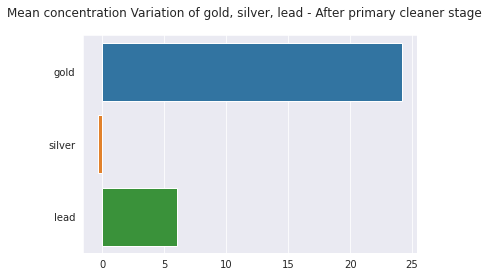

In [44]:
data = [au_size.mean(), ag_size.mean(), pb_size.mean()]
labels = ['gold','silver', 'lead']
sns.barplot(x = data, y= labels)
plt.suptitle("Mean concentration Variation of gold, silver, lead - After primary cleaner stage")
plt.show()

<div class="alert alert-info">
    <b> The mean has changed in the stages dramatically for gold in a positive amount.  Also lead has increased in the purification stages, while silver has a small negative change in its mean.
</div>

<b>Compare the feed particle size distributions in the training set and in the test set. If the distributions vary significantly, the model evaluation will be incorrect.

In [45]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5383 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5383 non-null   object 
 1   primary_cleaner.input.sulfate               5383 non-null   float64
 2   primary_cleaner.input.depressant            5383 non-null   float64
 3   primary_cleaner.input.feed_size             5383 non-null   float64
 4   primary_cleaner.input.xanthate              5383 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5383 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5383 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5383 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5383 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5383 non-null   float64
 10  primary_clea

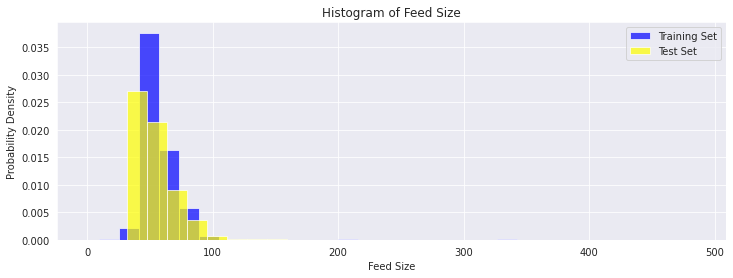

Test set is yellow, training set is blue


In [46]:
def feed_hist(feed_train, feed_test):
    plt.figure(figsize=(12, 4))
    plt.hist(feed_train, bins=30, density=True, color="blue", alpha=0.7, label='Training Set')
    plt.hist(feed_test, bins=30, density=True, color="yellow", alpha=0.7, label='Test Set')
    plt.xlabel('Feed Size')
    plt.ylabel('Probability Density')
    plt.title('Histogram of Feed Size')
    plt.legend()
    plt.grid(True)
    plt.show()

feed_hist(df_train['rougher.input.feed_size'], df_test['rougher.input.feed_size'])
print('Test set is yellow, training set is blue')


In [47]:
df_train['rougher.input.feed_size'].describe()

count    11163.000000
mean        57.287111
std         18.861999
min          9.659576
25%         48.409372
50%         53.889870
75%         61.606460
max        484.967466
Name: rougher.input.feed_size, dtype: float64

In [48]:
#Eliminating anomalies from dataset
df_train = df_train.loc[df_train['rougher.input.feed_size']  > 35]
df_train = df_train.loc[df_train['rougher.input.feed_size']  < 100] 
df_test = df_test.loc[df_test['rougher.input.feed_size']  > 35] 
df_test = df_test.loc[df_test['rougher.input.feed_size']  < 100] 

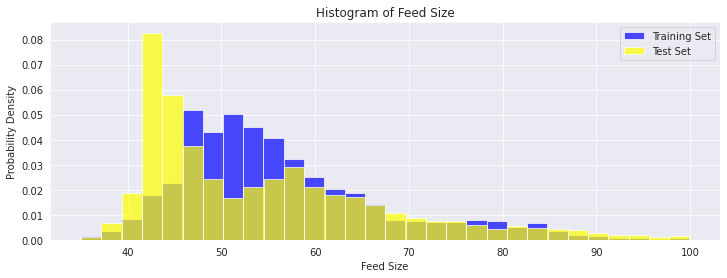

Feed size particles before floatation stage, in training set and test set, no anomalies


In [49]:
#Comparing feed particle size after flotation stage

feed_hist(df_train['rougher.input.feed_size'], df_test['rougher.input.feed_size'])
print('Feed size particles before floatation stage, in training set and test set, no anomalies')

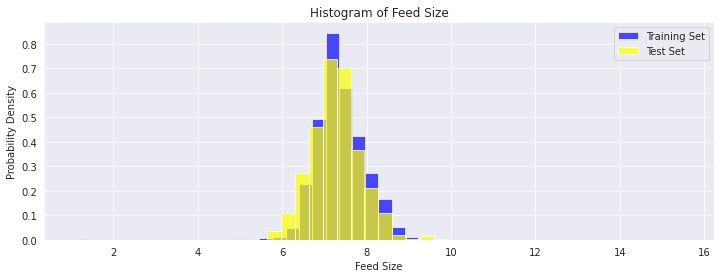

Feed size particles before primary cleaner stage in training set and test set


In [50]:
#Comparing feed particle size after the primary cleaner stage

feed_hist(df_train['primary_cleaner.input.feed_size'], df_test['primary_cleaner.input.feed_size'])
print('Feed size particles before primary cleaner stage in training set and test set')

In [51]:
#Cutting out anamolies
df_train = df_train.loc[df_train['primary_cleaner.input.feed_size']  > 5.5]
df_train = df_train.loc[df_train['primary_cleaner.input.feed_size']   < 9]
df_test = df_test.loc[df_test['primary_cleaner.input.feed_size']   > 5.5]
df_test = df_test.loc[df_test['primary_cleaner.input.feed_size']   < 9]

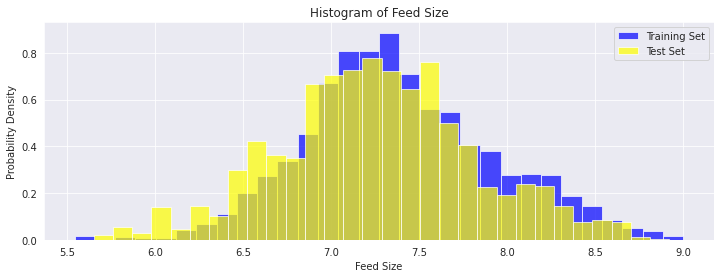

Feed size particles, in primary cleaner stage, in training set and test set, no anomalies


In [52]:
#Comparing feed particle size in the primary cleaner stage.

feed_hist(df_train['primary_cleaner.input.feed_size'], df_test['primary_cleaner.input.feed_size'])
print('Feed size particles, in primary cleaner stage, in training set and test set, no anomalies')

<div class="alert alert-success">
<b>Reviewer's comment</b>

Good job comparing feed size distributions!

</div>

<br><br><b>Consider the total concentrations of all substances at different stages: raw feed, rougher concentrate, and final concentrate. Do you notice any abnormal values in the total distribution? If you do, is it worth removing such values from both samples? Describe the findings and eliminate anomalies

In [53]:
#Training set sample
#Feature engineer new col for total concentrations for rougher input/output, primary and final stage- train set
df_train['rougher.input.feed_total'] = df_train['rougher.input.feed_au'] + df_train['rougher.input.feed_ag'] + df_train['rougher.input.feed_pb'] + df_train['rougher.input.feed_sol']
df_train['rougher.output.feed_total'] = df_train['rougher.output.concentrate_au'] + df_train['rougher.output.concentrate_ag'] + df_train['rougher.output.concentrate_pb'] + df_train['rougher.output.concentrate_sol']
df_train['primary_cleaner.output.feed_total'] = df_train['primary_cleaner.output.concentrate_au'] + df_train['primary_cleaner.output.concentrate_ag'] + df_train['primary_cleaner.output.concentrate_pb'] + df_train['primary_cleaner.output.concentrate_sol']
df_train['final.output.feed_total'] = df_train['final.output.concentrate_au'] + df_train['final.output.concentrate_ag'] + df_train['final.output.concentrate_pb'] + df_train['final.output.concentrate_sol']

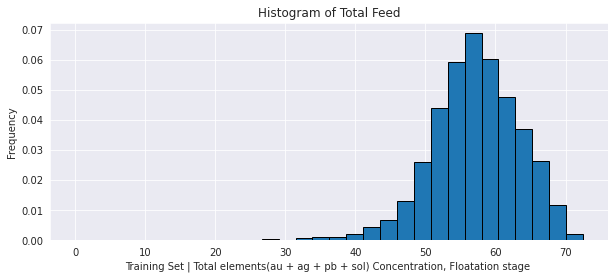

In [54]:
#Visualize
plt.figure(figsize=(10, 4))
plt.hist(df_train['rougher.input.feed_total'], bins=30, density=True, edgecolor='black')
plt.xlabel('Training Set | Total elements(au + ag + pb + sol) Concentration, Floatation stage ')
plt.ylabel('Frequency')
plt.title('Histogram of Total Feed')
plt.grid(True)
plt.show()

In [55]:
print(df_train['rougher.input.feed_total'])

0        51.680034
1        50.659114
2        50.609929
3        51.061546
4        47.859163
           ...    
16852    52.157631
16853    52.140053
16854    52.937188
16855    53.415050
16859    53.535054
Name: rougher.input.feed_total, Length: 10906, dtype: float64


In [56]:
#Cut anamolies
no_outliers_input_total = df_train.loc[df_train['rougher.input.feed_total'] > 32 ]['rougher.input.feed_total']

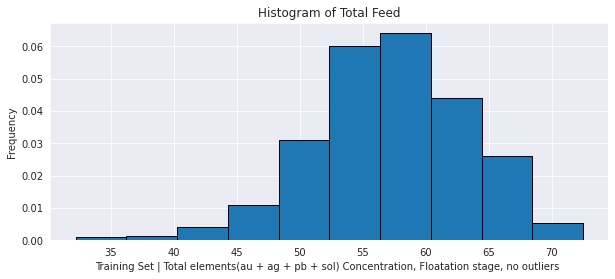

In [57]:
#Visualize cut outliers
plt.figure(figsize=(10, 4))
plt.hist(no_outliers_input_total, density=True, edgecolor='black')
plt.xlabel('Training Set | Total elements(au + ag + pb + sol) \
Concentration, Floatation stage, no outliers ')
plt.ylabel('Frequency')
plt.title('Histogram of Total Feed')
plt.grid(True)
plt.show()


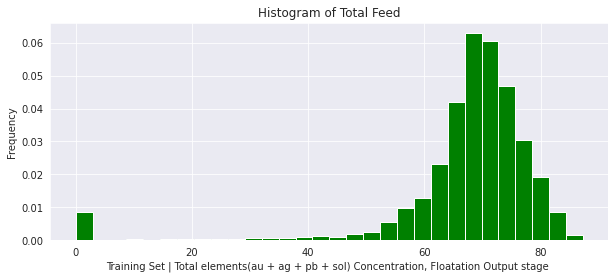

In [58]:
#Visualize Output
plt.figure(figsize=(10, 4))
plt.hist(df_train['rougher.output.feed_total'], bins=30, density=True, color='green')
plt.xlabel('Training Set | Total elements(au + ag + pb + sol) Concentration, Floatation Output stage ')
plt.ylabel('Frequency')
plt.title('Histogram of Total Feed')
plt.grid(True)
plt.show()

In [59]:
no_outlier_output_total = df_train.loc[df_train['rougher.output.feed_total'] > 40] ['rougher.output.feed_total']

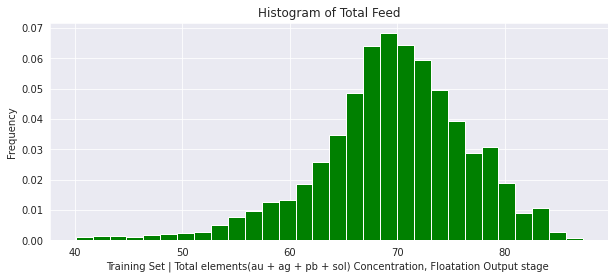

In [60]:
#Visualize Output
plt.figure(figsize=(10, 4))
plt.hist(no_outlier_output_total, bins=30, density=True, color='green')
plt.xlabel('Training Set | Total elements(au + ag + pb + sol) Concentration, Floatation Output stage ')
plt.ylabel('Frequency')
plt.title('Histogram of Total Feed')
plt.grid(True)
plt.show()

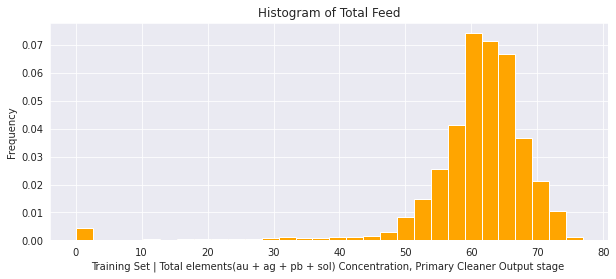

In [61]:
#Visualize Primary Output
plt.figure(figsize=(10, 4 ))
plt.hist(df_train['primary_cleaner.output.feed_total'], bins=30, density=True, color='orange')
plt.xlabel('Training Set | Total elements(au + ag + pb + sol) Concentration, Primary Cleaner Output stage ')
plt.ylabel('Frequency')
plt.title('Histogram of Total Feed')
plt.grid(True)
plt.show()


In [62]:
no_outliers_primary = df_train[df_train['primary_cleaner.output.feed_total'] > 45]\
['primary_cleaner.output.feed_total']

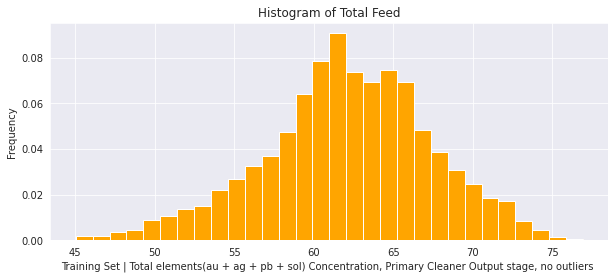

In [63]:
#Visualize Primary Output, no outliers
plt.figure(figsize=(10, 4))
plt.hist(no_outliers_primary, bins=30, density=True, color='orange')
plt.xlabel('Training Set | Total elements(au + ag + pb + sol) Concentration, \
Primary Cleaner Output stage, no outliers ')
plt.ylabel('Frequency')
plt.title('Histogram of Total Feed')
plt.grid(True)
plt.show()

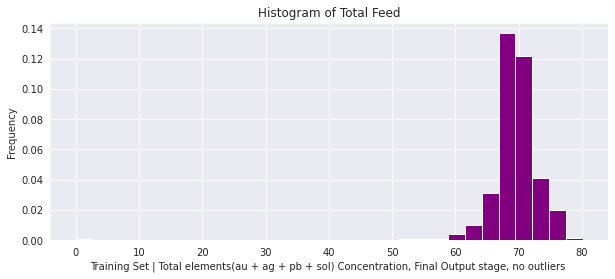

In [64]:
#Visualize Final Output
plt.figure(figsize=(10, 4))
plt.hist(df_train['final.output.feed_total'], bins=30, density=True, color='purple')
plt.xlabel('Training Set | Total elements(au + ag + pb + sol) Concentration, \
Final Output stage, no outliers ')
plt.ylabel('Frequency')
plt.title('Histogram of Total Feed')
plt.grid(True)
plt.show()

In [65]:
no_outliers_final = df_train[df_train['final.output.feed_total'] > 55]['final.output.feed_total']

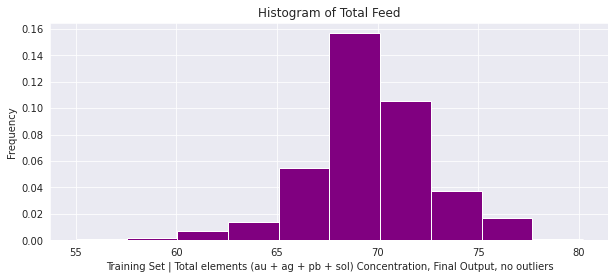

In [66]:
#Visual Final output no outliers
plt.figure(figsize=(10,4))
plt.hist(no_outliers_final, density=True, color="purple")
plt.xlabel('Training Set | Total elements (au + ag + pb + sol) Concentration, \
Final Output, no outliers')
plt.ylabel('Frequency')
plt.title('Histogram of Total Feed')
plt.grid(True)
plt.show()

In [67]:
#Test set sample feature engineer total col
df_test['rougher.input.feed_total'] = df_test['rougher.input.feed_au'] + df_test['rougher.input.feed_ag']\
                                        + df_test['rougher.input.feed_pb'] + df_test['rougher.input.feed_sol']

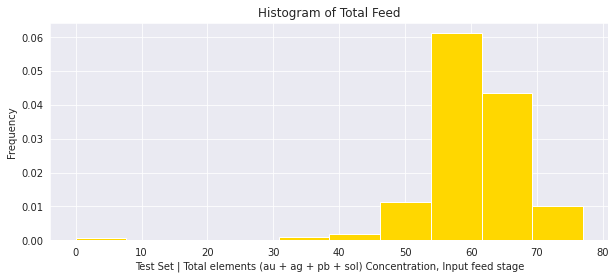

In [68]:
#Test set sample
#Visual 
plt.figure(figsize=(10,4))
plt.hist(df_test['rougher.input.feed_total'], density=True, color="gold")
plt.xlabel('Test Set | Total elements (au + ag + pb + sol) Concentration, \
Input feed stage')
plt.ylabel('Frequency')
plt.title('Histogram of Total Feed')
plt.grid(True)
plt.show()

In [69]:
#Test set no outliers
no_outliers_test_input = df_test[df_test['rougher.input.feed_total'] > 30]['rougher.input.feed_total']

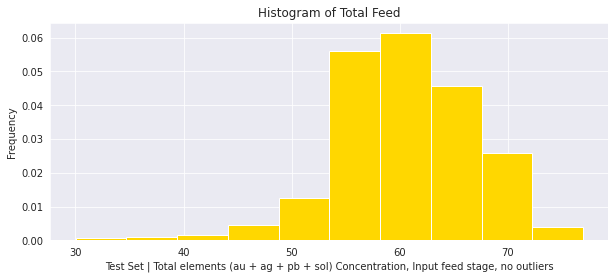

In [70]:
#Visual 
plt.figure(figsize=(10,4))
plt.hist(no_outliers_test_input, density=True, color="gold")
plt.xlabel('Test Set | Total elements (au + ag + pb + sol) Concentration, \
Input feed stage, no outliers')
plt.ylabel('Frequency')
plt.title('Histogram of Total Feed')
plt.grid(True)
plt.show()

<div class="alert alert-warning">
<b>Reviewer's comment</b>

Rows with abnormal total concentration were detected and removed, but it seems that the filtered dataframes are not actually used anywhere

</div>

In [71]:
df_train.shape

(10906, 93)

In [72]:
df_test.shape

(5228, 54)



<div class="alert alert-info">
    <h3>Update: Conclusion Analyze the data</h3>
        <p>As we can see silver increased in the purification and then returned to nearly same amount of concentration.  The output of gold dramatically increases; while lead also increases, doubling itself and then nearly multiplying by half itself. Gold is the leading produced product by far in the second and third purification process.<br>
            We can see the different amounts of concentration of each metal within the ore mixture at different stages. <br><br>
            The first three subplots of histograms show (gold) AU concentrations at differents stages. During the feeding of the flotation stage AU concentrations vary in a range among 4 and 12. After rougher instead it has values in range 12 and 25. And after primary cleaner feeding the values are in range 15 and 41.<br><br>
              The next three subplots of histograms show (silver) AG concentrations at differents stages. During the feeding of the flotation stage AU concentrations vary in a range among 4 and 14. After rougher instead it has values in range 7 and 19. And after primary cleaner feeding the values are in range 8 and 13.<br><br>
              The last three subplots of histograms show (lead) PB concentrations at differents stages. During the feeding of the flotation stage AU concentrations vary in a range among 1 and 6. After rougher instead it has values in range 4 and 12. And after primary cleaner feeding the values are in range 2.5 and 15.<br><br>
            We want to understand if the feed particle size change significantly among the two sets, training and test. In the first histogram we can see the feed size in the TRAINING SET in Blue and in the TESTING SET in Yellow.  I built a density histogram and eliminated outliers (<35 and >100) for the flotation stage inputs. The newer graph give a closer view of the data with peaks between 47 and 52 in the training set while the testing set does not present so many values around 50, but the peak on 42 count more values instead.
Building a density histograms we can confirm similarities and non-similarities in training and test set.
<br><br>        
    I noticed and understood how the concentration of metals changed during differents purification stages and took note of the variations of substances. For total concentration of metal values for floatation stage there were nearly half the values total in ranged outward in outliers; meaning our total data was in the range of 35-70 and outliers ranged 0-30.  Cutting the outliers makes a difference. Each stage; input of rougher feed, output of rougher feed, primary_cleaner output, and final concentration had outliers. <br>
            I saved the dataframes with the outlier removed, mainly removing below 35 for each total concentration. <br>
            The new shape for the training set is (10906, 93) and the test set is (5228, 54).</p>
</div>

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

Please check the conclusions after fixing the Au-Ag mix-up

</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Very good!

</div>

<div class="alert alert-info">
    <h2>Build the model</h2>
        <p>Write a function to calculate the final sMAPE value.</p>
</div>



Train different models. Evaluate them using cross-validation. Pick the best model and test it using the test sample. Provide findings.

In [73]:
# Remove unnecessary columns to build the model for the testing set.
columns_to_drop = ['primary_cleaner.output.concentrate_sol', 'final.output.tail_pb', 'secondary_cleaner.output.tail_pb',
                   'primary_cleaner.output.tail_pb', 'final.output.tail_sol', 'final.output.concentrate_sol',
                   'secondary_cleaner.output.tail_sol', 'primary_cleaner.output.concentrate_ag', 'rougher.output.tail_pb',
                   'rougher.output.concentrate_pb', 'final.output.tail_ag', 'primary_cleaner.output.tail_au',
                   'secondary_cleaner.output.tail_au', 'rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au',
                   'rougher.calculation.sulfate_to_au_concentrate', 'secondary_cleaner.output.tail_ag',
                   'primary_cleaner.output.tail_ag', 'rougher.output.tail_sol', 'final.output.tail_au',
                   'rougher.output.concentrate_sol', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.tail_sol',
                   'final.output.concentrate_ag', 'rougher.output.tail_ag', 'rougher.calculation.floatbank10_sulfate_to_au_feed',
                   'final.output.concentrate_au', 'rougher.output.tail_au', 'rougher.output.concentrate_ag',
                   'final.output.concentrate_pb', 'rougher.calculation.au_pb_ratio', 'rougher.calculation.floatbank11_sulfate_to_au_feed',
                   'rougher.output.feed_total', 'primary_cleaner.output.feed_total', 'final.output.feed_total']

df_train = df_train.drop(columns_to_drop, axis=1)


<div class="alert alert-success">
<b>Reviewer's comment</b>

Output and calculation columns were dropped from the train set

</div>

In [74]:
#For TESTING DATA
#creating a temporany DataFrame for a target column from df_full to merge it with df_test.
df_target = pd.DataFrame()
df_target['rougher.output.recovery'] = df_full['rougher.output.recovery']
df_target['final.output.recovery'] = df_full['final.output.recovery']
df_target['date'] = df_full['date']
display(df_target)

,rougher.output.recovery,final.output.recovery,date
0,87.107763,70.541216,2016-01-15 00:00:00
1,86.843261,69.266198,2016-01-15 01:00:00
2,86.842308,68.116445,2016-01-15 02:00:00
3,87.226430,68.347543,2016-01-15 03:00:00
4,86.688794,66.927016,2016-01-15 04:00:00
...,...,...,...
22711,89.574376,73.755150,2018-08-18 06:59:59
22712,87.724007,69.049291,2018-08-18 07:59:59
22713,88.890579,67.002189,2018-08-18 08:59:59
22714,89.858126,65.523246,2018-08-18 09:59:59


In [75]:
# FOR TESTING DATA
#Merge df_test and df_target on date column.
df_test = df_test.merge(df_target, on ='date', how='inner')

<div class="alert alert-success">
<b>Reviewer's comment</b>

Targets were merged with the test set correctly

</div>

In [76]:
#Dropping NaN values obtained in the target column.
df_test = df_test.dropna()
df_train = df_train.dropna()

In [77]:
#Defining features and target for training set.
train_features = df_train.drop(['rougher.output.recovery','date', 'final.output.recovery', 'recovery', 'error'], axis=1)
train_target_final = df_train['final.output.recovery']
train_target_rougher = df_train['rougher.output.recovery']


In [78]:
#Defining features and target for testing set.
test_features = df_test.drop(['rougher.output.recovery','date', 'final.output.recovery'], axis=1)
test_target_final = df_test['final.output.recovery']
test_target_rougher = df_test['rougher.output.recovery']


<div class="alert alert-info">
    <b> Updated</b><p>`recovery` and `error` dropped from train set</p>
</div>

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

Good, but `recovery` and `error` columns which can leak target were not dropped from the train set

</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Ok!

</div>


In [79]:
# Defining the symmetric Mean Absolute Percentage Error function
def smape(target, predictions):
    denominator = (np.abs(target) + np.abs(predictions)) 
    difference = (target - predictions) / denominator
    difference[denominator == 0] = 0.0  # Avoiding inf values
    return 200 * np.mean(difference) 

# Defining function of Final Symmetric Mean Absolute Error.
def final_smape(smape_1, smape_2):
    f_smape = (smape_1 * 25 / 100) + (smape_2 * 75 / 100)
    print('Final SMAPE score is equal to:', f_smape.round(3), '%')
    return f_smape


<div class="alert alert-success">
<b>Reviewer's comment</b>

Functions for SMAPE calculation are correct

</div>

In [80]:
# Creating pipelines, scaling each model
pipe_decision = Pipeline([('scaler0', StandardScaler()),
                    ('DecisionTreeRegressor', DecisionTreeRegressor())])
pipe_forest = Pipeline([('scaler1', StandardScaler()),
                    ('Random Forest Regressor', RandomForestRegressor())])
pipe_linear = Pipeline([('scaler2', StandardScaler()),
                       ('Linear Regression', LinearRegression())])

# Creating list of pipelines.
pipelines = [pipe_decision, pipe_forest, pipe_linear]

# Creating a dictionary of pipelines.
pipe_dict = {pipe_decision: 'DecisionTreeRegressor', pipe_forest:'Random Forest Regressor', \
             pipe_linear:'Linear Regression'}

# Creating an smape scoring variable to pass it to cross-validation functions.
smape_cal = make_scorer(smape, greater_is_better=False)



# Looping through pipelines to obtain cross-validation results.
for pipe in pipelines:
    print(pipe_dict[pipe])
    print(cross_val_score(pipe, train_features, train_target_rougher, scoring=smape_cal, cv=4))
    # Cross-validation for the rougher target
    rougher_smape = (abs(np.sum(cross_val_score(pipe, train_features, train_target_rougher, scoring=smape_cal, cv=4))))
    rougher_smape_cv = rougher_smape / 4
    print('Rougher SMAPE:', rougher_smape_cv)
    
    # Cross-validation for the final target
    final_smape_value = (abs(np.sum(cross_val_score(pipe, train_features, train_target_final, scoring=smape_cal, cv=4))))
    secondary_smape_cv = final_smape_value / 4
    print('Secondary SMAPE:', secondary_smape_cv)
    
    final_smape(rougher_smape_cv, secondary_smape_cv)
    print()


DecisionTreeRegressor
[-64.89542094 -23.83864851 -65.4314265   -3.35711624]
Rougher SMAPE: 34.07093716634361
Secondary SMAPE: 5.614859057043377
Final SMAPE score is equal to: 12.729 %

Random Forest Regressor
[-15.78977403 -14.83446672  -9.66330343  -1.48854079]
Rougher SMAPE: 9.32755326889917
Secondary SMAPE: 1.7239541294409164
Final SMAPE score is equal to: 3.625 %

Linear Regression
[5.09009883 1.79427497 8.70504302 1.99473294]
Rougher SMAPE: 4.396037438676048
Secondary SMAPE: 0.08037016491895077
Final SMAPE score is equal to: 1.159 %



<div class="alert alert-success">
<b>Reviewer's comment</b>

Great, you tried a few different models and compared their results using cross-validation with our target metric. Nice use of pipelines! The scorer was initialized correctly

</div>

In [ ]:
#TUNING RANDOM FOREST REGRESSOR MODEL PARAMETERS

#Creating a dictionary to pass it to Cross Validation as scoring variable.
smape_dict = {'SMAPE':make_scorer(smape, greater_is_better = False)}

#Creating a parameters dictionary for possible hyperparameters values (DecisionTreeRegressor)
parameters = {'n_estimators': (25, 50),
              'max_depth': (10,16,20)
             } 

#Making out a grid for CV tuning parameters from parameter Grid and SMAPE as score.
forest_grid = GridSearchCV(RandomForestRegressor(random_state=42),
                   scoring=smape_dict,
                   refit='SMAPE',
                   cv=4,
                   param_grid=parameters)

#Creating the model for target_rougher
forest_grid_model = forest_grid.fit(train_features, train_target_rougher)
#Printing top values.
print(forest_grid_model.best_estimator_)
rougher_smape = forest_grid_model.best_score_
print('Rougher smape', rougher_smape)

#Creating the model for target_final
forest_grid_model1 = forest_grid.fit(train_features, train_target_final)
#Printing top values.
print(forest_grid_model1.best_estimator_)
secondary_smape =forest_grid_model1.best_score_
print('Secondary smape', secondary_smape)

final_smape(rougher_smape, secondary_smape)
print('Random Forest Regressor')

<div class="alert alert-success">
<b>Reviewer's comment</b>

Excellent, you tuned the model's hyperparameters using a cross-validated grid search

</div>

<b>Testing models

In [ ]:
#TESTING RANDOM FOREST REGRESSOR MODEL.

forest_model = RandomForestRegressor(random_state = 42, n_estimators=25, max_depth=10, criterion='mae')

#Rougher calculations
pipe_forest.fit(train_features, train_target_rougher)
pipe_forest_predictions_rougher = pipe_forest.predict(test_features)

smape_test_rougher_forest = smape(test_target_rougher, _forest_predictions_rougher)
print('Rougher SMAPE', smape_test_rougher_forest.round(3),'%')

#Secondary calculations
linear_model.fit(train_features, train_target_final)
linear_predictions_secondary = linear_model.predict(test_features)
smape_test_secondary_linear = smape(test_target_final, linear_predictions_secondary)
print('Secondary SMAPE', smape_test_secondary_linear.round(3),'%')

#Final SMAPE calculation.
final_smape(smape_test_rougher_forest, smape_test_secondary_linear)
print('Test on Random Forest Regressor')

In [ ]:
#TESTING LINEAR REGRESSION MODEL.

linear_model = LinearRegression()

#Rougher calculations
pipe_linear.fit(train_features, train_target_rougher)
linear_predictions_rougher = pipe_linear.predict(test_features)

smape_test_rougher_linear = smape(test_target_rougher, linear_predictions_rougher)
print('Rougher SMAPE', smape_test_rougher_linear.round(3),'%')

#Secondary calculations
linear_model.fit(train_features, train_target_final)
linear_predictions_secondary = linear_model.predict(test_features)
smape_test_secondary_linear = smape(test_target_final, linear_predictions_secondary)
print('Secondary SMAPE', smape_test_secondary_linear.round(3),'%')

#Final SMAPE calculation.
final_smape(smape_test_rougher_linear, smape_test_secondary_linear)
print('Test on Linear Regression')

<div class="alert alert-info">
 Test features now matching
</div>

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

The models could not be evaluated on the test set due to a mismatch in features

</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Ok, fixed!

</div>

Sanity check

In [ ]:
#SANITY CHECK

#Creating a DummyRegressor model.
dummy = DummyRegressor()

#Rougher calculations
dummy.fit(train_features, train_target_rougher)
dummy_predictions_rougher = dummy.predict(test_features)

smape_test_rougher_dummy = smape(test_target_rougher, dummy_predictions_rougher)
print('Rougher SMAPE', smape_test_rougher_dummy.round(3),'%')

#Secondary calculations
dummy.fit(test_features, test_target_final)
dummy_predictions_secondary = dummy.predict(test_features)
smape_test_secondary_dummy = smape(test_target_final, dummy_predictions_secondary)
print('Secondary SMAPE', smape_test_secondary_dummy.round(3),'%')

#Final SMAPE calculation.
final_smape(smape_test_rougher_dummy, smape_test_secondary_dummy)
print("Dummy's evaluation")

<div class="alert alert-success">
<b>Reviewer's comment</b>

It's great that you have a simple baseline!

</div>



<div class="alert alert-info">
    <h3>Conclusion</h3>
         <p> Created features and targets for model, prepared functions for cross validation, and built the models calculating metric smape for each model. </p>
</div>

<div class="alert alert-info">
    <h2>Update:Conclusion</h2>
         <p>  Chain multiple data processing steps and a machine learning model into a single unit using pipeline. For sMape the lower the number the better. I make a variable to create a scorer for smape indicating lower number is better.  For results the final SMAPE for each model, using cross-validation is:<br>DecisionTreeRegressor
Final SMAPE score is equal to: 12.729 %

Random Forest Regressor
Final SMAPE score is equal to: 3.625 %


Linear Regression
Final SMAPE score is equal to: 1.159 % <br>
    I hypertuned parameters for randomforestregressor using maxdepth and n_estimators, finding best option and applying those.  I use a dummyregressor for the sanity check, in-which dummy regressor makes predictions based on very simple strategies without considering the input features or any learned patterns from the data.  In final, we can say that the LinearRegression model perform best the required tasks, with lower smape. The build requires much computational power and I would recommend evaluating the performance of these algorithms across a larger parameter space, since creating the random forest regressor with these parameter search values and creating pipelines for such took an extended amount of time.  </p>
<div>

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

Please check the conclusions after fixing the problems above

</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Good work!

</div>